# 1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

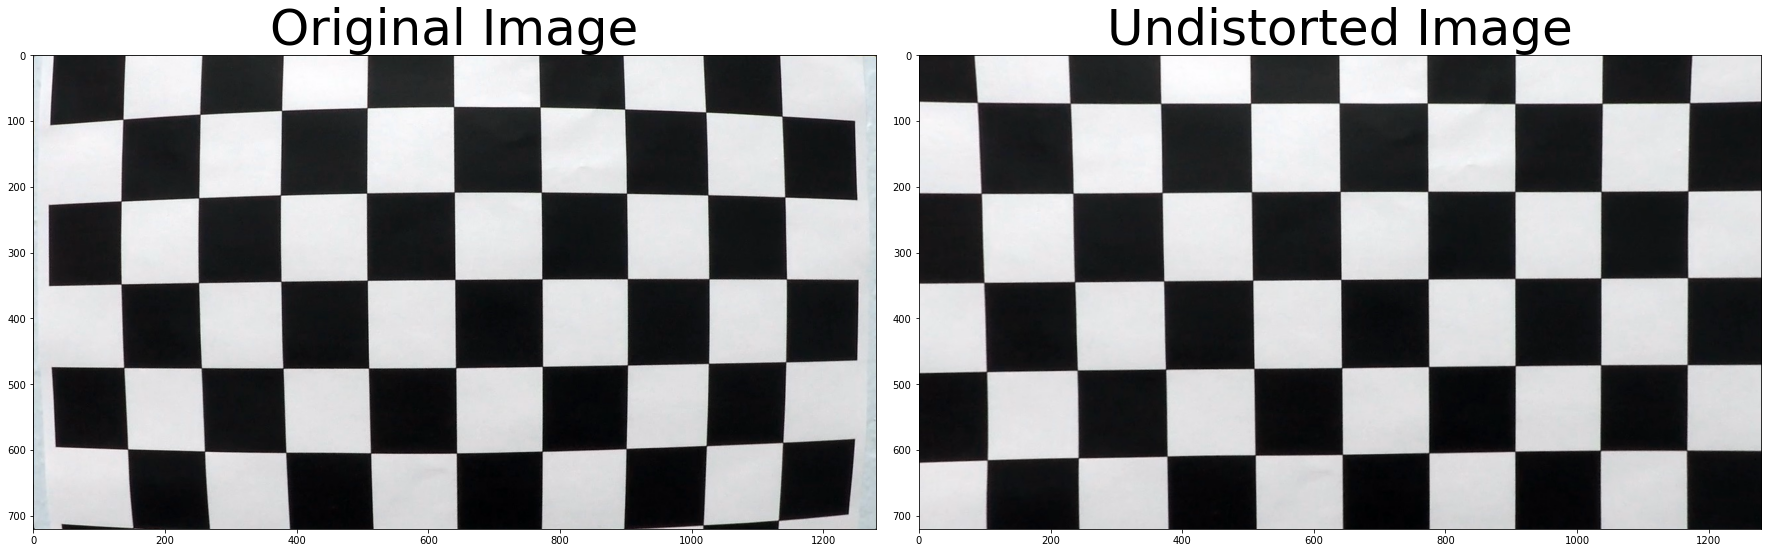

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

# Read in and make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
# Arrays to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ..., (5,3,0)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2) # x, y coordinates

def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

for fname in images:
    # read in each image
    img = mpimg.imread(fname)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # If found, draw corners
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

img = cv2.imread('camera_cal/calibration1.jpg')
undistorted = cal_undistort(img, objpoints, imgpoints)
cv2.imwrite('output_images/undistortedChessboard_calibration1.jpg', undistorted)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig('output_images/undistortedChessboard.jpg')

# 2. Apply a distortion correction to raw images

1
[[ 0.  0.  0.]
 [ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
[10. 11. 12.]
2


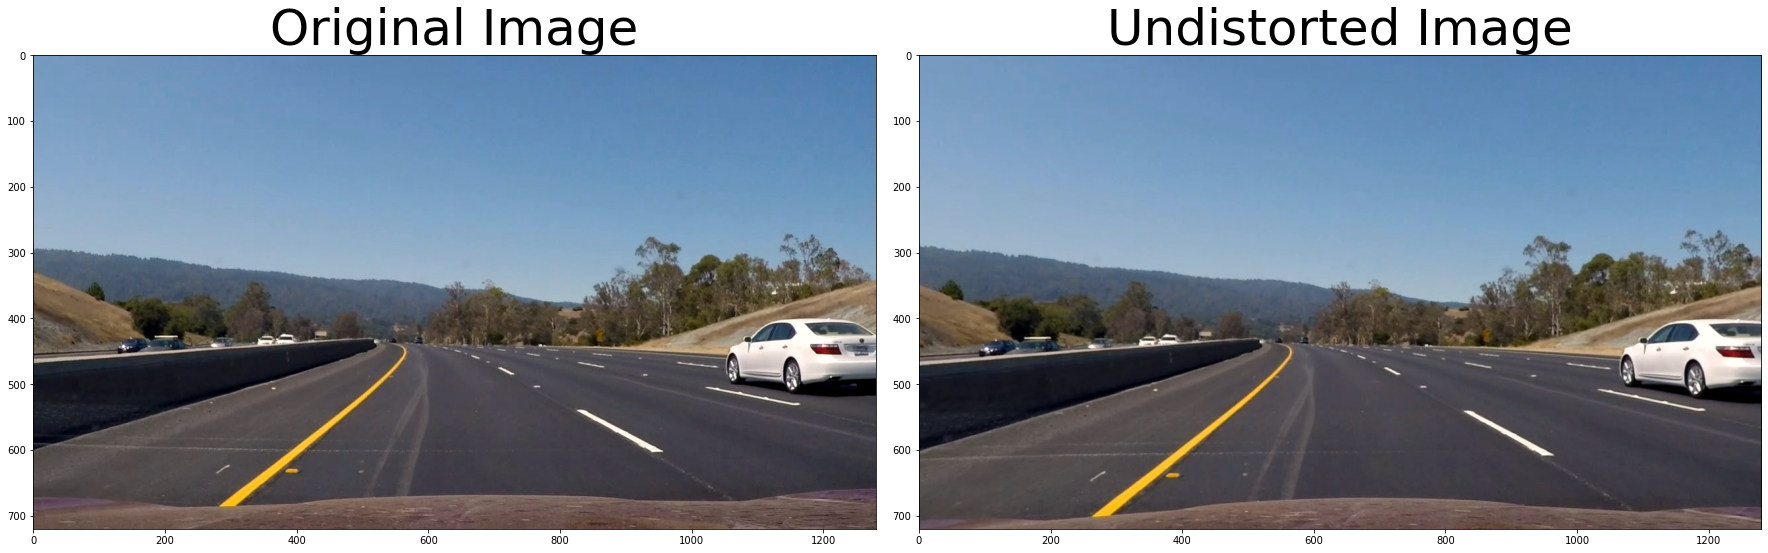

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

# Read in and make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
# Arrays to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ..., (5,3,0)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2) # x, y coordinates

def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

for fname in images:
    # read in each image
    img = mpimg.imread(fname)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # If found, draw corners
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)


# save objpoints and imgpoints as file
np.save('output_images/objpoints_save', objpoints)
np.save('output_images/imgpoints_save', imgpoints)

img = cv2.imread('output_images/wrongDetection.jpg')
undistorted = cal_undistort(img, objpoints, imgpoints)
cv2.imwrite('output_images/undistortedRawImage.jpg', undistorted)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

a = np.array([False])
#print(a)
a = np.zeros(3)
print(a.ndim)
a = np.vstack((a, np.array([1,2,3])))
a = np.vstack((a, np.array([4,5,6])))
a = np.vstack((a, np.array([7,8,9])))
a = np.vstack((a, np.array([10,11,12])))
print(a)
print(a[1:])
print(a[a.shape[0]-1])
print(a.ndim)

# 3. Use color transforms, gradients, etc., to create a thresholded binary image

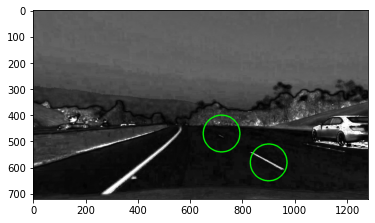

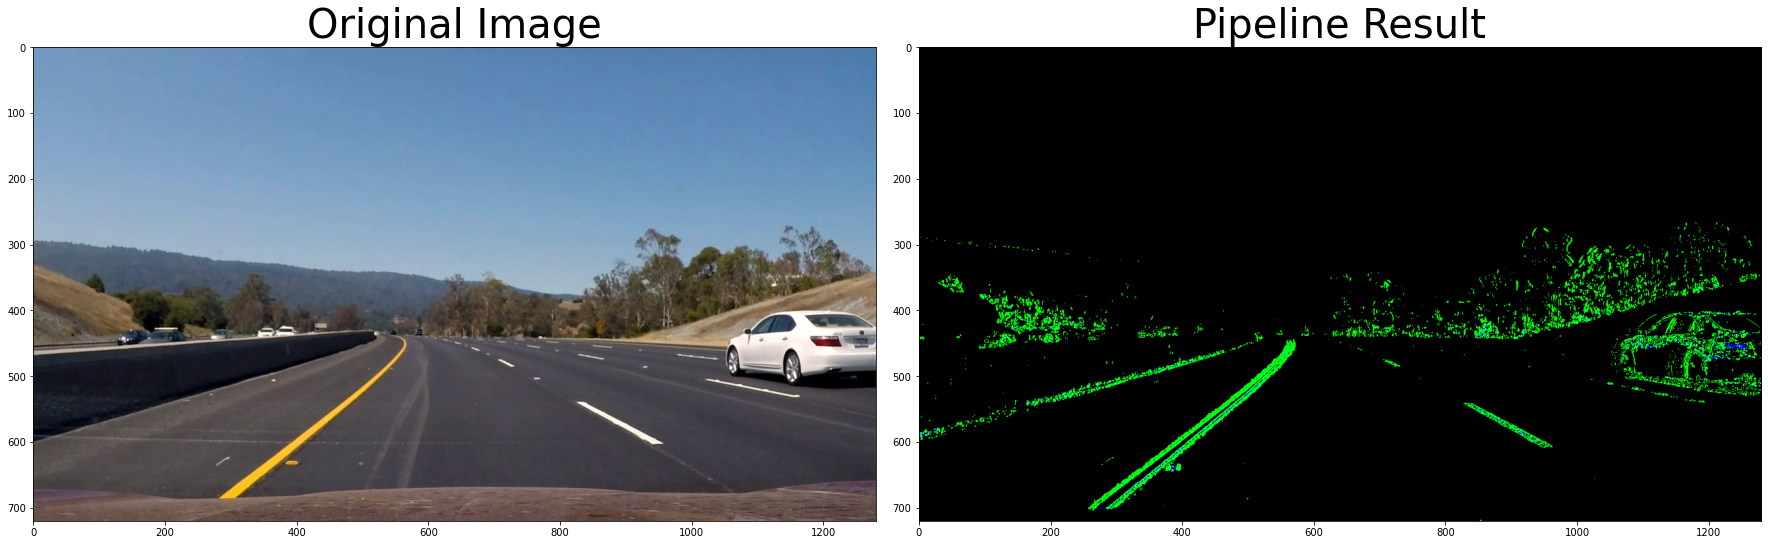

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

# load saved objpoints and imgpoints
objpoints = np.load('output_images/objpoints_save.npy')
imgpoints = np.load('output_images/imgpoints_save.npy')

image = cv2.imread('output_images/wrongDetection.jpg')

def cal_undistort(img, objpoints, imgpoints):
    h,w = img.shape[:2]
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (w,h), None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)

    undistorted = cal_undistort(img, objpoints, imgpoints)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(undistorted, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    
    
    cv2.imwrite('output_images/s_channel.jpg', s_channel)
    image_s = cv2.imread('output_images/s_channel.jpg')
    cv2.circle(image_s, (720, 470), 70, (0,255,0), 3)
    cv2.circle(image_s, (900, 580), 70, (0,255,0), 3)
    cv2.imwrite('output_images/s_channel_withCircle.jpg', image_s)
    plt.imshow(image_s)
    
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Add graysacle
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelxGray = cv2.Sobel(grayimg, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelxGray = np.absolute(sobelxGray) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelGray = np.uint8(255*sobelxGray/np.max(abs_sobelxGray))
    sxbinary[(scaled_sobelGray >= 50) & (scaled_sobelGray <= 70)] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    
result = pipeline(image, (170, 200), (15, 100))
cv2.imwrite('output_images/thresholded_binary.jpg', result)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# 4. Apply a perspective transform to rectify binary image ("birds-eye view")

720 1280


True

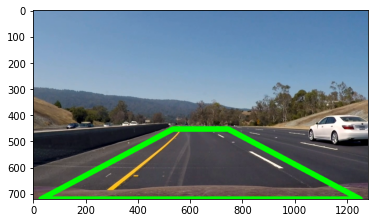

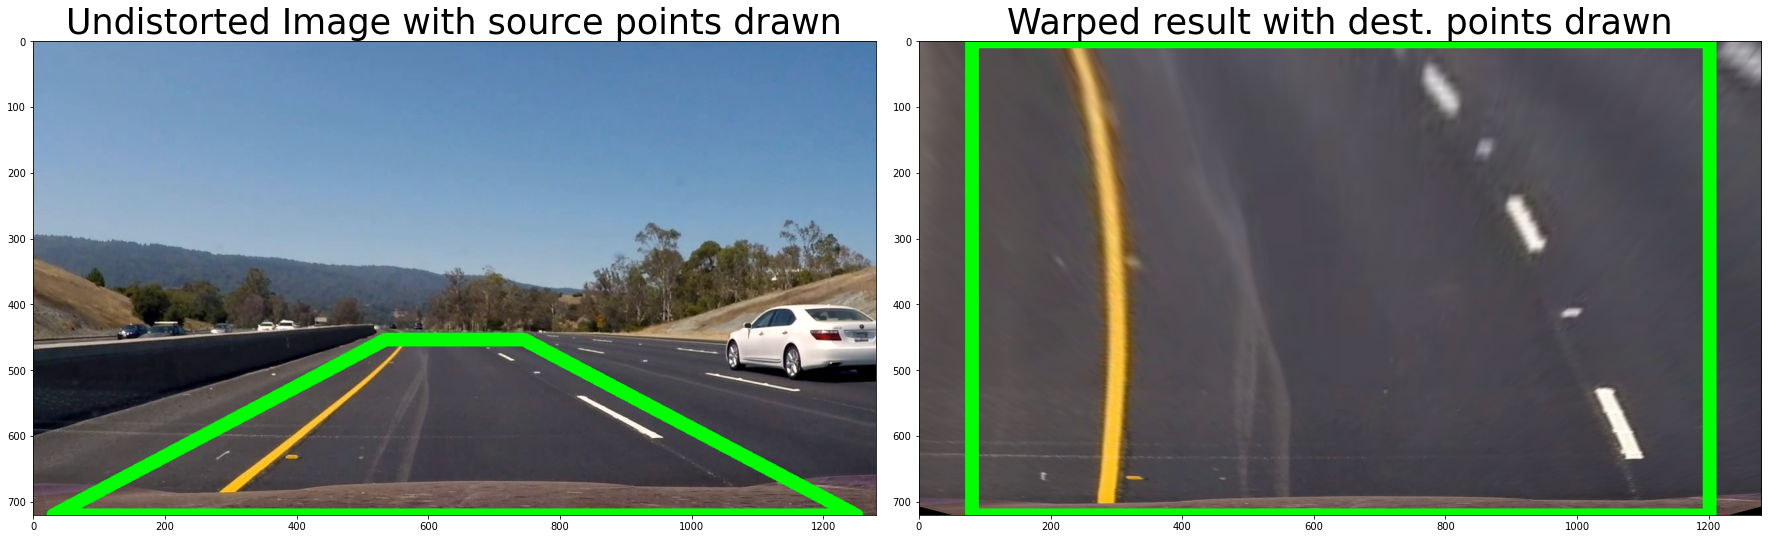

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

# load saved objpoints and imgpoints
objpoints = np.load('output_images/objpoints_save.npy')
imgpoints = np.load('output_images/imgpoints_save.npy')

image = cv2.imread('output_images/wrongDetection.jpg')
h,w = image.shape[:2]
print(h,w)

src = np.float32([[535,453],[30,h],[1250,h],[1280-535,453]])
dst = np.float32([[80,0],[80,h],[1280-80,h],[1280-80,0]])

# save objpoints and imgpoints as file
np.save('output_images/warp_src_save', src)
np.save('output_images/warp_dst_save', dst)

M = cv2.getPerspectiveTransform(src, dst)
    
def cal_undistort(img, objpoints, imgpoints):
    h,w = img.shape[:2]
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (w,h), None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 250), sx_thresh=(20, 100)):
    img = np.copy(img)
    # 
    undistorted = cal_undistort(img, objpoints, imgpoints)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(undistorted, cv2.COLOR_BGR2HLS)
    s_channel = hls[:,:,2]
    
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    #plt.imshow(scaled_sobel)
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    #plt.imshow(sxbinary)
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    #plt.imshow(s_binary)

    # Add graysacle
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelxGray = cv2.Sobel(grayimg, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelxGray = np.absolute(sobelxGray) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelGray = np.uint8(255*sobelxGray/np.max(abs_sobelxGray))
    sxbinary[(scaled_sobelGray >= 50) & (scaled_sobelGray <= 70)] = 1
    
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    img_withArea = np.copy(image)
    cv2.line(img_withArea, (535,453), (30,h), (0,255,0), 20)
    cv2.line(img_withArea, (30,h), (1250,h), (0,255,0), 20)
    cv2.line(img_withArea, (1250,h), (1280-535,453), (0,255,0), 20)
    cv2.line(img_withArea, (1280-535,453), (535,453), (0,255,0), 20)
    plt.imshow(img_withArea)
    #cv2.imwrite('output_images/pointsFromSrc.jpg', color_binary)
    warped = cv2.warpPerspective(color_binary, M, (img.shape[1],img.shape[0]), flags=cv2.INTER_LINEAR)
    warped_img = cv2.warpPerspective(image, M, (img.shape[1],img.shape[0]), flags=cv2.INTER_LINEAR)
    cv2.line(warped_img, (80,0), (80,h), (0,255,0), 20)
    cv2.line(warped_img, (80,h), (1280-80,h), (0,255,0), 20)
    cv2.line(warped_img, (1280-80,h), (1280-80,0), (0,255,0), 20)
    cv2.line(warped_img, (1280-80,0), (80,0), (0,255,0), 20)
    
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(img_withArea)
    ax1.set_title('Undistorted Image with source points drawn', fontsize=35)

    ax2.imshow(warped_img)
    ax2.set_title('Warped result with dest. points drawn', fontsize=35)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.savefig('output_images/warped_straight_lines.jpg')
    return warped

#result = pipeline(image, (170, 200), (15, 100))
#result = pipeline(image, (150, 230), (17, 110))
result = pipeline(image, (170, 255), (20, 100))
cv2.imwrite('output_images/warped_binary.jpg', result)

# 5. Detect lane pixels and fit to find the lane boundary - histodiagram

720 1280


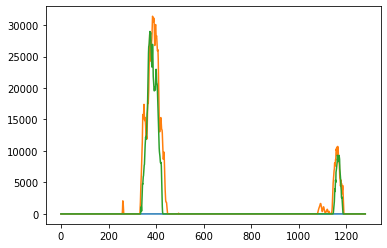

In [62]:
# import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

# load saved objpoints and imgpoints
objpoints = np.load('output_images/objpoints_save.npy')
imgpoints = np.load('output_images/imgpoints_save.npy')

image = cv2.imread('output_images/curvatureTooooSmall.jpg')
h,w = image.shape[:2]
print(h,w)

# load saved objpoints and imgpoints
src = np.load('output_images/warp_src_save.npy')
dst = np.load('output_images/warp_dst_save.npy')
#src = np.float32([[560,450],[30,h],[1250,h],[710,450]])
#dst = np.float32([[180,0],[180,h],[1060,h],[1060,0]])
M = cv2.getPerspectiveTransform(src, dst)
    
def cal_undistort(img, objpoints, imgpoints):
    h,w = img.shape[:2]
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (w,h), None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # 
    undistorted = cal_undistort(img, objpoints, imgpoints)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(undistorted, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # add GrayScale
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelxGray = cv2.Sobel(grayimg, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelxGray = np.absolute(sobelxGray) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelGray = np.uint8(255*sobelxGray/np.max(abs_sobelxGray))
    sxbinary[(scaled_sobelGray >= 50) & (scaled_sobelGray <= 70)] = 1
    
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    
    #color_binary = cv2.line(color_binary, (500,450), (500,450), (0,255,0), 20)
    #color_binary = cv2.line(color_binary, (80,h), (80,h), (0,255,0), 20)
    #color_binary = cv2.line(color_binary, (1200,h), (1200,h), (0,255,0), 20)
    #color_binary = cv2.line(color_binary, (780,450), (780,450), (0,255,0), 20)
    warped = cv2.warpPerspective(color_binary, M, (img.shape[1],img.shape[0]), flags=cv2.INTER_LINEAR)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return warped
    
#result = pipeline(image, (170, 200), (15, 100))
result = pipeline(image, (170, 250), (40, 90))
#plt.imshow(result)

def hist(img):
    # TO-DO: Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]

    # TO-DO: Sum across image pixels vertically - make sure to set `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

# Create histogram of image binary activations
histogram = hist(result)

# Visualize the resulting histogram
plt.plot(histogram)

# 6. Detect lane pixels and fit to find the lane boundary

[-3.14042660e-04  2.86710745e-01  2.36924898e+02] [6.05450973e-05 3.74468756e-01 8.21212087e+02]


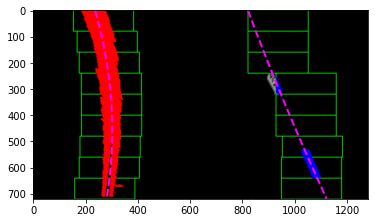

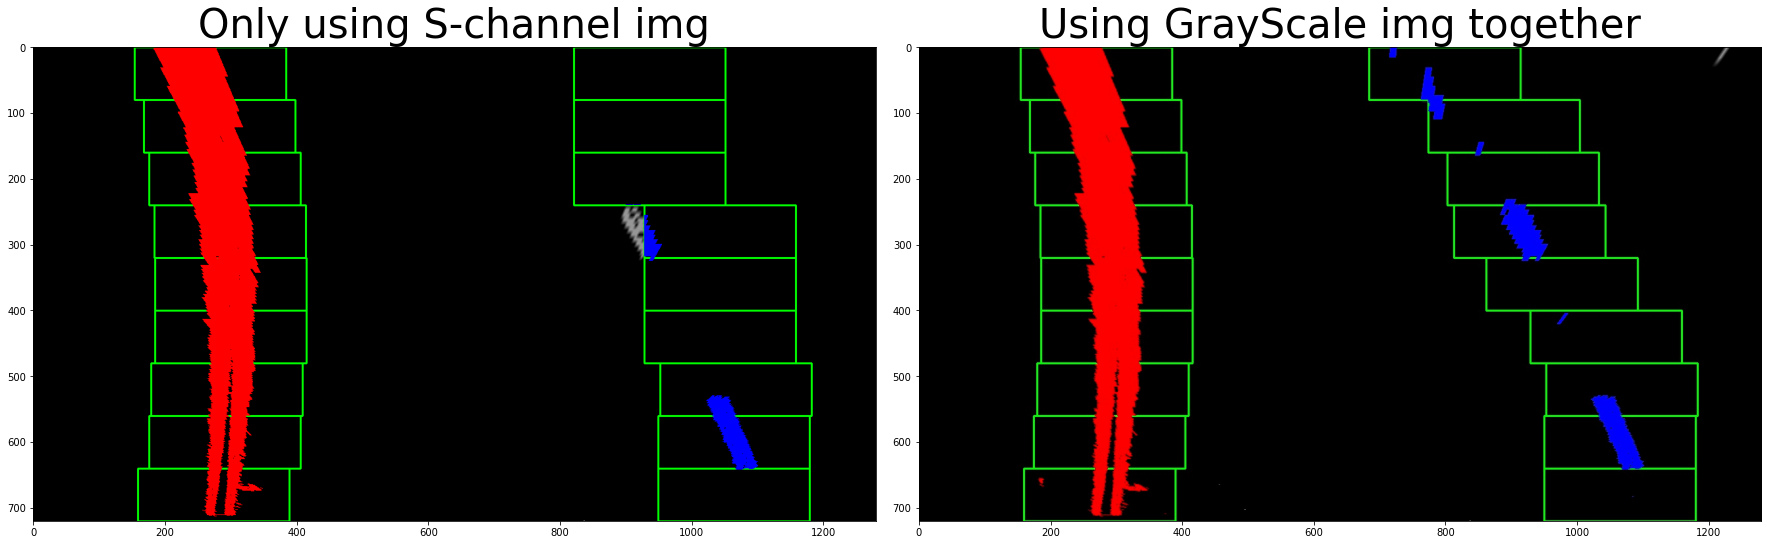

In [3]:
# import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

# load saved objpoints and imgpoints
objpoints = np.load('output_images/objpoints_save.npy')
imgpoints = np.load('output_images/imgpoints_save.npy')

image = cv2.imread('output_images/wrongDetection.jpg')
h,w = image.shape[:2]

# load saved objpoints and imgpoints
src = np.load('output_images/warp_src_save.npy')
dst = np.load('output_images/warp_dst_save.npy')
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

def cal_undistort(img, objpoints, imgpoints):
    h,w = img.shape[:2]
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (w,h), None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # 
    undistorted = cal_undistort(img, objpoints, imgpoints)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(undistorted, cv2.COLOR_BGR2HLS)
    s_channel = hls[:,:,2]
    
    #h_binary = np.zeros_like(h_channel)
    #h_binary[(h_channel < 100) | (h_channel > 150)] = 1
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Add graysacle
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelxGray = cv2.Sobel(grayimg, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelxGray = np.absolute(sobelxGray) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelGray = np.uint8(255*sobelxGray/np.max(abs_sobelxGray))
    #sxbinary[(scaled_sobelGray >= 50) & (scaled_sobelGray <= 70)] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    warped = cv2.warpPerspective(color_binary, M, (img.shape[1],img.shape[0]), flags=cv2.INTER_LINEAR)
    plt.imshow(warped)
    gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray)
    return gray
    
result = pipeline(image, (170, 200), (15, 100))

#result = pipeline(image, (165, 230), (23, 100))
#plt.imshow(result)

##################################################################################################
######################################### MOVING WINDOWS #########################################
##################################################################################################

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = int(histogram.shape[0]//2)
    #plt.plot(histogram)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 115
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = int(binary_warped.shape[0]//nwindows)

    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin  # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin  # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds) > minpix:
            leftx_current = int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    print(left_fit, right_fit)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    #Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='magenta', linestyle='dashed', linewidth=2)
    plt.plot(right_fitx, ploty, color='magenta', linestyle='dashed', linewidth=2)
    
    left_fitx_arr = np.array(left_fitx)
    right_fitx_arr = np.array(right_fitx)
    ploty_arr = np.array(ploty)
    
    return out_img

out_img = fit_polynomial(result)
#plt.savefig('output_images/onlySchannelEdgeDetection.jpg')
#plt.savefig('output_images/addGrayScaleEdgeDetection.jpg')
#cv2.imwrite('output_images/movingWindows.jpg', out_img)

image_withGray = cv2.imread('output_images/movingWindows.jpg')
plt.imshow(out_img)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(out_img)
ax1.set_title('Only using S-channel img', fontsize=40)

ax2.imshow(image_withGray)
ax2.set_title('Using GrayScale img together', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig('output_images/addGrayChannel')

# 7. Determine the curvature of the lane and vehicle position with respect to center & Warp the detected lane boundaries back onto the original image

735.6221799351247 m 247.10129392430386 m


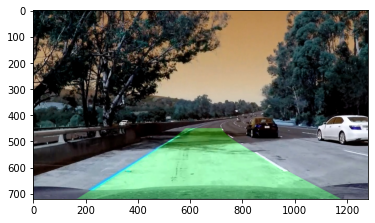

In [198]:
# import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

# load saved objpoints and imgpoints
objpoints = np.load('output_images/objpoints_save.npy')
imgpoints = np.load('output_images/imgpoints_save.npy')

image = cv2.imread('test_images/test5.jpg')
h,w = image.shape[:2]

# load saved objpoints and imgpoints
src = np.load('output_images/warp_src_save.npy')
dst = np.load('output_images/warp_dst_save.npy')
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

def cal_undistort(img, objpoints, imgpoints):
    h,w = img.shape[:2]
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (w,h), None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # 
    undistorted = cal_undistort(img, objpoints, imgpoints)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(undistorted, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    warped = cv2.warpPerspective(color_binary, M, (img.shape[1],img.shape[0]), flags=cv2.INTER_LINEAR)
    gray = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)
    return gray
    
result = pipeline(image, (170, 200), (15, 100))
#plt.imshow(result)

##################################################################################################
######################################### MOVING WINDOWS #########################################
##################################################################################################

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = int(histogram.shape[0]//2)
    #plt.plot(histogram)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = int(binary_warped.shape[0]//nwindows)

    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin  # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin  # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds) > minpix:
            leftx_current = int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####
    left_fit_m = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_m = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    left_curverad = ((1 + (2*left_fit_m[0]*y_eval*ym_per_pix + left_fit_m[1])**2)**1.5) / np.absolute(2*left_fit_m[0]) ## Implement the calculation of the left line here
    right_curverad = ((1 + (2*right_fit_m[0]*y_eval*ym_per_pix + right_fit_m[1])**2)**1.5) / np.absolute(2*right_fit_m[0]) ## Implement the calculation of the right line here

    print(left_curverad, 'm', right_curverad, 'm')
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary_warped.shape[1], binary_warped.shape[0])) 
    # Combine the result with the original image
    out_img = cv2.addWeighted(image, 1, newwarp, 0.3, 0)

    return out_img


out_img = fit_polynomial(result)

plt.imshow(out_img)

# 8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position

True

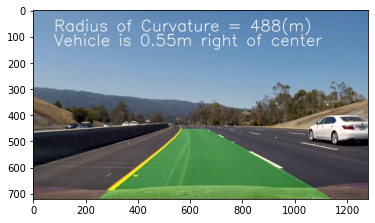

In [18]:
# n iterations
N = 20
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = np.zeros(3)
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None  

R_Line = Line()
L_Line = Line()
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# load saved objpoints and imgpoints
objpoints = np.load('output_images/objpoints_save.npy')
imgpoints = np.load('output_images/imgpoints_save.npy')

# load saved objpoints and imgpoints
src = np.load('output_images/warp_src_save.npy')
dst = np.load('output_images/warp_dst_save.npy')
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

image = cv2.imread('output_images/wrongDetection.jpg')

def cal_undistort(img, objpoints, imgpoints):
    h,w = img.shape[:2]
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (w,h), None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    undistorted = cal_undistort(img, objpoints, imgpoints)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(undistorted, cv2.COLOR_BGR2HLS)
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Add graysacle
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelxGray = cv2.Sobel(grayimg, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelxGray = np.absolute(sobelxGray) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelGray = np.uint8(255*sobelxGray/np.max(abs_sobelxGray))
    sxbinary[(scaled_sobelGray >= 50) & (scaled_sobelGray <= 70)] = 1
    
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    warped = cv2.warpPerspective(color_binary, M, (img.shape[1],img.shape[0]), flags=cv2.INTER_LINEAR)
    gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    return gray

def find_lane_pixels(binary_warped, DIR):
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # if detection is founded at previous time, no need to find lane pixels
    if DIR.detected == True:
        search_around_poly(binary_warped, DIR)
        return 0

    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = int(histogram.shape[0]//2)
    #plt.plot(histogram)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint    
    
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = int(binary_warped.shape[0]//nwindows)

    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base
    
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin  # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin  # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds) > minpix:
            leftx_current = int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = int(np.mean(nonzerox[good_right_inds]))

    plt.imshow(out_img)
    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    if DIR == L_Line:
        DIR.allx = nonzerox[left_lane_inds]
        DIR.ally = nonzeroy[left_lane_inds]
    else:
        DIR.allx = nonzerox[right_lane_inds]
        DIR.ally = nonzeroy[right_lane_inds]
    
###### END of def find_lane_pixels(binary_warped, DIR): ######

def search_around_poly(binary_warped, DIR):
    print("coming here?")
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    lane_inds = ((nonzerox > (DIR.best_fit[0]*(nonzeroy**2) + DIR.best_fit[1]*nonzeroy + 
                    DIR.best_fit[2] - margin)) & (nonzerox < (DIR.best_fit[0]*(nonzeroy**2) + 
                    DIR.best_fit[1]*nonzeroy + DIR.best_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    DIR.allx = nonzerox[left_lane_inds]
    DIR.ally = nonzeroy[left_lane_inds] 

def fit_polynomial(DIR):
    
    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    line_fit = np.polyfit(DIR.ally, DIR.allx, 2)
    
    if np.all(DIR.current_fit == 0):
        DIR.current_fit = np.array(line_fit)
        DIR.diffs = np.zeros(3)
        DIR.best_fit = np.array(line_fit)
    else:
        if len(DIR.current_fit)<N:
            DIR.current_fit = np.vstack((DIR.current_fit, line_fit))
        else :
            DIR.current_fit = np.vstack((DIR.current_fit[1:], line_fit))
        DIR.diffs = abs(DIR.current_fit[DIR.current_fit.shape[0]-1,:]-DIR.current_fit)
        DIR.best_fit = DIR.current_fit.mean(axis=0)   
    
    fitx_bottom = DIR.best_fit[0]*h**2 + DIR.best_fit[1]*h + DIR.best_fit[2]
    
    if DIR == L_Line:
        DIR.line_base_pos = w/2-fitx_bottom
        #print("line_fit:", line_fit, "L_Line.current_fit:", DIR.current_fit)
    else:
        DIR.line_base_pos = fitx_bottom-w/2
        #print("line_fit:", line_fit, "R_Line.current_fit:", DIR.current_fit)
        
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = h-1
    
    ##### TO-DO: Implement the calculation of R_curve (meter of curvature) #####
    line_fit_m = np.polyfit(DIR.ally*ym_per_pix, DIR.allx*xm_per_pix, 2)
    DIR.radius_of_curvature = ((1 + (2*line_fit_m[0]*y_eval*ym_per_pix + line_fit_m[1])**2)**1.5) / np.absolute(2*line_fit_m[0]) ## Implement the calculation of the left line here
    #print(DIR.radius_of_curvature)
    #print(format(left_curve_m, ".2f"), 'm', format(right_curve_m, ".2f"), 'm')

def sanity_check():
    proper_distance = False
    if L_Line.line_base_pos<0:
        print("ERR: left line is detected right half-side of image")
    elif R_Line.line_base_pos<0:
        print("ERR: right line is detected left half-side of image")
    else:
        line_width = xm_per_pix*(L_Line.line_base_pos+R_Line.line_base_pos)
        if 2 < line_width and line_width < 5:
            proper_distance = True
        else:
            print("ERR: sanity test failed !!! due to unproper lines distance", line_width)
    
    if abs(L_Line.radius_of_curvature-R_Line.radius_of_curvature) < 10000:
        similar_curves = True
    else:
        similar_curves = False
        print("sanity test failed !!! due to big difference between curvatures", L_Line.radius_of_curvature, R_Line.radius_of_curvature)
    
    if abs(L_Line.best_fit[0]-R_Line.best_fit[0])<0.001 :
        similar_slpoe = True
    else:
        similar_slpoe = False
        print("sanity test failed !!! due to big difference between slopes")
        print(abs(L_Line.best_fit[0]-R_Line.best_fit[0]), abs(L_Line.best_fit[1]-R_Line.best_fit[1]))
        
    return (proper_distance and similar_curves and similar_slpoe)    

def draw_line(binary_warped):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    #print("L_Line.best_fit:", L_Line.best_fit, "R_Line.best_fit:", R_Line.best_fit)
    try:
        L_Line.bestx = L_Line.best_fit[0]*ploty**2 + L_Line.best_fit[1]*ploty + L_Line.best_fit[2]
        R_Line.bestx = R_Line.best_fit[0]*ploty**2 + R_Line.best_fit[1]*ploty + R_Line.best_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        L_Line.bestx = 1*ploty**2 + 1*ploty
        R_Line.bestx = 1*ploty**2 + 1*ploty
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([L_Line.bestx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([R_Line.bestx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    
    #plt.imshow(color_warp)
    
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary_warped.shape[1], binary_warped.shape[0])) 
    return newwarp
    
def process_image(image):
    colored_image = np.copy(image)
    result = pipeline(image, (170, 200), (15, 100))
    
    find_lane_pixels(result, L_Line)
    find_lane_pixels(result, R_Line)
    #plt.imshow(binary_pixels)
    
    ######## Check find pixels ########
    #out_img = np.dstack((result, result, result))
    #out_img[L_Line.ally, L_Line.allx] = [255, 0, 0]
    #out_img[R_Line.ally, R_Line.allx] = [0, 0, 255]
    #plt.imshow(out_img)
    ###################################
    
    fit_polynomial(L_Line)
    fit_polynomial(R_Line)
    
    if sanity_check() == False:
        if L_Line.detected == True:
            L_Line.detected = False
            L_Line.current_fit[L_Line.current_fit.shape[0]-1] = L_Line.current_fit[L_Line.current_fit.shape[0]-2]
            L_Line.best_fit = L_Line.current_fit.mean(axis=0)
        if R_Line.detected == True:
            R_Line.detected = False
            R_Line.current_fit[R_Line.current_fit.shape[0]-1] = R_Line.current_fit[R_Line.current_fit.shape[0]-2]
            R_Line.best_fit = R_Line.current_fit.mean(axis=0)
            
    linedwarp = draw_line(result)

    ######## Check find polyfits ########
    #ploty = np.linspace(0, result.shape[0]-1, result.shape[0] )
    #plt.plot(L_Line.bestx, ploty, color='yellow')
    #plt.plot(R_Line.bestx, ploty, color='yellow')
    #plt.imshow(out_img)
    ###################################
    

    # Combine the result with the original image and put text on image
    out_img = cv2.addWeighted(colored_image, 1, linedwarp, 0.3, 0)
    disp = "Radius of Curvature = " + str(int((R_Line.radius_of_curvature+L_Line.radius_of_curvature)/2)) + "(m)"
    cv2.putText(out_img, disp, (80,80), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
    if L_Line.line_base_pos>R_Line.line_base_pos :
        dir_str = "left"
    else :
        dir_str = "right"
    disp = "Vehicle is " + str(format((abs(L_Line.line_base_pos-R_Line.line_base_pos)*xm_per_pix), ".2f")) + "m " + dir_str + " of center"
    cv2.putText(out_img, disp, (80,135), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
    
    #plt.imshow(result)
    return out_img

img_lineDetected = process_image(image)
plt.imshow(img_lineDetected)
cv2.imwrite('output_images/final_output.jpg', img_lineDetected)

# 9. Play video

In [76]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# n iterations
N = 10
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = np.zeros(3)
        #radius of curvature of the line in meters
        self.radius_of_curvature = None 
        #previous radius of curvature of the line in meters
        self.radius_of_curvature_old = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None  

R_Line = Line()
L_Line = Line()

# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# load saved objpoints and imgpoints
objpoints = np.load('output_images/objpoints_save.npy')
imgpoints = np.load('output_images/imgpoints_save.npy')

# load saved objpoints and imgpoints
src = np.load('output_images/warp_src_save.npy')
dst = np.load('output_images/warp_dst_save.npy')
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

def cal_undistort(img, objpoints, imgpoints):
    h,w = img.shape[:2]
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (w,h), None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    undistorted = cal_undistort(img, objpoints, imgpoints)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(undistorted, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    h_channel = hls[:,:,1]
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= 100) & (h_channel <= 150)] = 1
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Add graysacle
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelxGray = cv2.Sobel(grayimg, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelxGray = np.absolute(sobelxGray) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelGray = np.uint8(255*sobelxGray/np.max(abs_sobelxGray))
    sxbinary[(scaled_sobelGray >= 50) & (scaled_sobelGray <= 70)] = 1
    
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary, h_binary)) * 255
    warped = cv2.warpPerspective(color_binary, M, (img.shape[1],img.shape[0]), flags=cv2.INTER_LINEAR)
    gray = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)
    return gray

def retain_previous_position(DIR):
    #print("retain_previous_position")
    DIR.current_fit[DIR.current_fit.shape[0]-1] = DIR.current_fit[DIR.current_fit.shape[0]-2]
    DIR.best_fit = DIR.current_fit.mean(axis=0)
    DIR.radius_of_curvature = DIR.radius_of_curvature_old

def find_lane_pixels(binary_warped):
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # if detection is founded at previous time, no need to find lane pixels
    if (L_Line.detected == True) and (R_Line.detected == True):
        search_around_poly(binary_warped, L_Line)
        search_around_poly(binary_warped, R_Line)
        
        #print("find_lane_pixels (1)", L_Line.allx, L_Line.ally, R_Line.allx, R_Line.ally)
        return 0
    
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = int(histogram.shape[0]//2)
    #plt.plot(histogram)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint    
    
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 125
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = int(binary_warped.shape[0]//nwindows)

    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base
    
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin  # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin  # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds) > minpix:
            leftx_current = int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    L_Line.allx = nonzerox[left_lane_inds]
    L_Line.ally = nonzeroy[left_lane_inds]
    R_Line.allx = nonzerox[right_lane_inds]
    R_Line.ally = nonzeroy[right_lane_inds]
    
    #print("find_lane_pixels (2)", L_Line.allx, L_Line.ally, R_Line.allx, R_Line.ally)
    return 0    
###### END of def find_lane_pixels(binary_warped, DIR): ######

def search_around_poly(binary_warped, DIR):
    #print("search_around_poly")
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 115

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    #print("search_around_poly", DIR.best_fit)
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    lane_inds = ((nonzerox > (DIR.best_fit[0]*(nonzeroy**2) + DIR.best_fit[1]*nonzeroy + 
                    DIR.best_fit[2] - margin)) & (nonzerox < (DIR.best_fit[0]*(nonzeroy**2) + 
                    DIR.best_fit[1]*nonzeroy + DIR.best_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    DIR.allx = nonzerox[lane_inds]
    DIR.ally = nonzeroy[lane_inds] 

def fit_polynomial(DIR, h, w, img):
    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    line_fit = np.polyfit(DIR.ally, DIR.allx, 2)
    
    if np.all(DIR.current_fit == 0):
        DIR.current_fit = np.array(line_fit)
        DIR.diffs = np.zeros(3)
        DIR.best_fit = np.array(line_fit)
        DIR.detected = True
    else:
        if len(DIR.current_fit)<N:
            DIR.current_fit = np.vstack((DIR.current_fit, line_fit))
        else :
            DIR.current_fit = np.vstack((DIR.current_fit[1:], line_fit))

        DIR.diffs = abs(DIR.current_fit[DIR.current_fit.shape[0]-2]-DIR.current_fit[DIR.current_fit.shape[0]-1])
        #print(DIR.diffs)
        if DIR.diffs[0]<0.0005 and DIR.diffs[1]<1:
            DIR.detected = True
        else:
            DIR.detected = False
            if DIR == L_Line:
                print("left line detection failed !!", DIR.diffs[0], DIR.diffs[1])
            else:
                print("right line detection failed !!", DIR.diffs[0], DIR.diffs[1])

    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = h-1
    
    ##### TO-DO: Implement the calculation of R_curve (meter of curvature) #####
    line_fit_m = np.polyfit(DIR.ally*ym_per_pix, DIR.allx*xm_per_pix, 2)
    DIR.radius_of_curvature = ((1 + (2*line_fit_m[0]*y_eval*ym_per_pix + line_fit_m[1])**2)**1.5) / np.absolute(2*line_fit_m[0])
    
    if DIR.radius_of_curvature  < 300:
        cv2.imwrite('output_images/curvatureTooooSmall.jpg', img)
    
    if DIR.radius_of_curvature > 18000 or DIR.radius_of_curvature < 300:
        DIR.detected = False
        if DIR == L_Line:
            print("Left lane curve is too big or too small", DIR.radius_of_curvature)
        else:
            print("Right lane curve is too big or too small", DIR.radius_of_curvature)
    else:
        DIR.detected = True
        
    #print(DIR.radius_of_curvature)
    #print(format(left_curve_m, ".2f"), 'm', format(right_curve_m, ".2f"), 'm')
    
    #print(DIR.detected, "before curvature fix :", "current_fit:", DIR.current_fit, ", best_fit:", DIR.best_fit, ", curvature:", DIR.radius_of_curvature)
    if DIR.current_fit.ndim > 1:
        if DIR.detected == False:
            retain_previous_position(DIR)
        else:
            DIR.best_fit = DIR.current_fit.mean(axis=0)
    
    #print(DIR.detected, "after curvature fix :", "current_fit:", DIR.current_fit, ", best_fit:", DIR.best_fit, ", curvature:", DIR.radius_of_curvature)
    fitx_bottom = DIR.best_fit[0]*h**2 + DIR.best_fit[1]*h + DIR.best_fit[2]
    
    if DIR == L_Line:
        DIR.line_base_pos = w/2-fitx_bottom
    else:
        DIR.line_base_pos = fitx_bottom-w/2
        

    
def draw_line(binary_warped):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )

    try:
        L_Line.bestx = L_Line.best_fit[0]*ploty**2 + L_Line.best_fit[1]*ploty + L_Line.best_fit[2]
        R_Line.bestx = R_Line.best_fit[0]*ploty**2 + R_Line.best_fit[1]*ploty + R_Line.best_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        L_Line.bestx = 1*ploty**2 + 1*ploty
        R_Line.bestx = 1*ploty**2 + 1*ploty
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([L_Line.bestx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([R_Line.bestx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    
    #plt.imshow(color_warp)
    
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary_warped.shape[1], binary_warped.shape[0])) 
    return newwarp

def sanity_check(image):
    global debug_flag
    
    proper_distance = False
    if L_Line.line_base_pos<0:
        print("ERR: left line is detected right half-side of image")
    elif R_Line.line_base_pos<0:
        print("ERR: right line is detected left half-side of image")
        cv2.imwrite('output_images/rightLaneErr.jpg', image)
    else:
        line_width = xm_per_pix*(L_Line.line_base_pos+R_Line.line_base_pos)
        if 2 < line_width and line_width < 5:
            proper_distance = True
        else:
            print("ERR: sanity test failed !!! due to unproper lines distance", line_width)
    
    if abs(L_Line.radius_of_curvature-R_Line.radius_of_curvature) < 10000:
        similar_curves = True
    else:
        similar_curves = False
        print("ERR: sanity test failed !!! due to big difference between curvatures", L_Line.radius_of_curvature, R_Line.radius_of_curvature)
    
    if abs(L_Line.best_fit[0]-R_Line.best_fit[0])<0.001:
        similar_slpoe = True
    else:
        similar_slpoe = False
        print("ERR: sanity test failed !!! due to big different slopes between left and right")
        print(L_Line.best_fit[0], R_Line.best_fit[0])
    
    return (proper_distance and similar_curves and similar_slpoe)    

def process_image(image):
    h,w = image.shape[:2]
    colored_image = np.copy(image)
    result = pipeline(image, (170, 200), (15, 100))
    
    find_lane_pixels(result)
    #plt.imshow(binary_pixels)
    
    ######## Check find pixels ########
    #out_img = np.dstack((result, result, result))
    #out_img[L_Line.ally, L_Line.allx] = [255, 0, 0]
    #out_img[R_Line.ally, R_Line.allx] = [0, 0, 255]
    #plt.imshow(out_img)
    ###################################
    
    fit_polynomial(L_Line, h, w, colored_image)
    fit_polynomial(R_Line, h, w, colored_image)
    
    #if (R_Line.radius_of_curvature+L_Line.radius_of_curvature)/2 > 1500:
    #    cv2.imwrite('output_images/too_big_curvature.jpg', colored_image)
    
    if sanity_check(colored_image) == False:
        if L_Line.detected == True:
            L_Line.detected = False
            retain_previous_position(L_Line)
        if R_Line.detected == True:
            R_Line.detected = False
            retain_previous_position(R_Line)
    
    L_Line.detected = False
    R_Line.detected = False
    #print("Sanity TRUE / Left:", L_Line.current_fit)
    #print("Sanity TRUE / Right:", R_Line.current_fit)
    #print("left detected?", L_Line.detected, "right detected?",R_Line.detected)
    
    #update the previous curvature
    L_Line.radius_of_curvature_old = L_Line.radius_of_curvature
    R_Line.radius_of_curvature_old = R_Line.radius_of_curvature
    #print("process_image", L_Line.best_fit,R_Line.best_fit)
    linedwarp = draw_line(result)

    ######## Check find polyfits ########
    #ploty = np.linspace(0, result.shape[0]-1, result.shape[0] )
    #plt.plot(L_Line.bestx, ploty, color='yellow')
    #plt.plot(R_Line.bestx, ploty, color='yellow')
    #plt.imshow(out_img)
    ###################################
    

    # Combine the result with the original image and put text on image
    out_img = cv2.addWeighted(colored_image, 1, linedwarp, 0.3, 0)
    
    disp = "Radius of Curvature = " + str(int((R_Line.radius_of_curvature+L_Line.radius_of_curvature)/2)) + "(m)"
    cv2.putText(out_img, disp, (80,80), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
    if L_Line.line_base_pos>R_Line.line_base_pos :
        dir_str = "left"
    else :
        dir_str = "right"
    disp = "Vehicle is " + str(format((abs(L_Line.line_base_pos-R_Line.line_base_pos)*xm_per_pix), ".2f")) + "m " + dir_str + " of center"
    cv2.putText(out_img, disp, (80,135), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
    #print("position:", abs(L_Line.line_base_pos-R_Line.line_base_pos)*xm_per_pix, ", currentFit-left:", L_Line.current_fit,", currentFit-right:", R_Line.current_fit)
    #plt.imshow(result)
    
    curv = int((R_Line.radius_of_curvature+L_Line.radius_of_curvature)/2)
    pos = abs(L_Line.line_base_pos-R_Line.line_base_pos)*xm_per_pix
    if curv == 393 and pos>=0.85 and pos<0.86:
        cv2.imwrite('output_images/wrongDetection.jpg', colored_image)
    return out_img

white_output = 'project_video_lineDetected.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   0%|          | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video project_video_lineDetected.mp4.
Moviepy - Writing video project_video_lineDetected.mp4



t:  14%|█▍        | 176/1260 [03:25<19:41,  1.09s/it, now=None]

Right lane curve is too big or too small 295.84739005715556


t:  14%|█▍        | 177/1260 [03:26<19:49,  1.10s/it, now=None]

Right lane curve is too big or too small 250.51793651841788


t:  14%|█▍        | 178/1260 [03:27<20:05,  1.11s/it, now=None]

Right lane curve is too big or too small 253.78822369055194


t:  14%|█▍        | 179/1260 [03:28<19:36,  1.09s/it, now=None]

Right lane curve is too big or too small 249.34601217158271


t:  14%|█▍        | 181/1260 [03:30<18:48,  1.05s/it, now=None]

Right lane curve is too big or too small 290.18037620284156


t:  14%|█▍        | 182/1260 [03:31<19:16,  1.07s/it, now=None]

Right lane curve is too big or too small 271.1897447883385


t:  15%|█▍        | 183/1260 [03:32<19:11,  1.07s/it, now=None]

Right lane curve is too big or too small 288.359051822758


t:  15%|█▍        | 184/1260 [03:33<19:11,  1.07s/it, now=None]

Right lane curve is too big or too small 295.343623662576


t:  15%|█▍        | 185/1260 [03:34<19:29,  1.09s/it, now=None]

Right lane curve is too big or too small 295.07913135066997


t:  15%|█▌        | 189/1260 [03:38<19:09,  1.07s/it, now=None]

Left lane curve is too big or too small 297.29914455644683
Right lane curve is too big or too small 286.75470904702814


t:  15%|█▌        | 190/1260 [03:39<19:00,  1.07s/it, now=None]

Left lane curve is too big or too small 299.6907721582077


t:  15%|█▌        | 192/1260 [03:42<18:44,  1.05s/it, now=None]

Left lane curve is too big or too small 299.96259443005243


t:  16%|█▌        | 196/1260 [03:46<18:30,  1.04s/it, now=None]

Right lane curve is too big or too small 299.09755263245955


t:  19%|█▉        | 238/1260 [04:30<19:22,  1.14s/it, now=None]

Right lane curve is too big or too small 299.4098362150677


t:  25%|██▌       | 316/1260 [05:51<16:42,  1.06s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 12703.369321847105 1449.3212803029428


t:  25%|██▌       | 317/1260 [05:52<16:21,  1.04s/it, now=None]

Left lane curve is too big or too small 42917.616821002885


t:  25%|██▌       | 318/1260 [05:53<16:10,  1.03s/it, now=None]

Left lane curve is too big or too small 182733.45667380153


t:  25%|██▌       | 319/1260 [05:54<16:22,  1.04s/it, now=None]

Left lane curve is too big or too small 50845.37133374824


t:  25%|██▌       | 320/1260 [05:55<16:57,  1.08s/it, now=None]

Left lane curve is too big or too small 91539.0312391278


t:  25%|██▌       | 321/1260 [05:56<16:28,  1.05s/it, now=None]

Left lane curve is too big or too small 105540.45388965143


t:  26%|██▌       | 322/1260 [05:57<16:05,  1.03s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 13469.419773478989 1373.6137367557933


t:  26%|██▌       | 323/1260 [05:58<16:26,  1.05s/it, now=None]

Left lane curve is too big or too small 40266.58775827086


t:  26%|██▌       | 324/1260 [05:59<16:21,  1.05s/it, now=None]

Left lane curve is too big or too small 258597.1566348452


t:  26%|██▌       | 325/1260 [06:00<16:23,  1.05s/it, now=None]

Left lane curve is too big or too small 28990.57087646632


t:  26%|██▌       | 326/1260 [06:01<16:15,  1.04s/it, now=None]

Left lane curve is too big or too small 88681.29913330238


t:  26%|██▌       | 328/1260 [06:03<16:18,  1.05s/it, now=None]

Left lane curve is too big or too small 20574.60193465503


t:  26%|██▌       | 329/1260 [06:04<15:51,  1.02s/it, now=None]

Left lane curve is too big or too small 511293.1058407189


t:  26%|██▌       | 330/1260 [06:05<16:11,  1.04s/it, now=None]

Left lane curve is too big or too small 20737.500467497863


t:  26%|██▋       | 332/1260 [06:07<15:41,  1.01s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 11933.826949537764 1344.122822148379


t:  27%|██▋       | 334/1260 [06:09<15:48,  1.02s/it, now=None]

Left lane curve is too big or too small 53070.93150434


t:  27%|██▋       | 335/1260 [06:10<15:51,  1.03s/it, now=None]

Left lane curve is too big or too small 126067.69982022833


t:  27%|██▋       | 336/1260 [06:12<15:51,  1.03s/it, now=None]

Left lane curve is too big or too small 46694.511665657476


t:  27%|██▋       | 337/1260 [06:13<16:27,  1.07s/it, now=None]

Left lane curve is too big or too small 21125.231668744662


t:  27%|██▋       | 338/1260 [06:14<16:23,  1.07s/it, now=None]

Left lane curve is too big or too small 146269.5853199068
Right lane curve is too big or too small 33074.01823224913


t:  27%|██▋       | 341/1260 [06:17<17:52,  1.17s/it, now=None]

Left lane curve is too big or too small 20150.110377507903


t:  27%|██▋       | 343/1260 [06:19<16:31,  1.08s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 12296.572637525956 2294.281310826464


t:  27%|██▋       | 346/1260 [06:23<15:44,  1.03s/it, now=None]

Left lane curve is too big or too small 84257.35250771775


t:  28%|██▊       | 349/1260 [06:26<16:21,  1.08s/it, now=None]

Left lane curve is too big or too small 25043.615806533555


t:  28%|██▊       | 351/1260 [06:28<16:15,  1.07s/it, now=None]

Left lane curve is too big or too small 23432.25643106715


t:  29%|██▊       | 361/1260 [06:38<15:23,  1.03s/it, now=None]

Left lane curve is too big or too small 36497.02226822816


t:  30%|██▉       | 377/1260 [06:55<15:18,  1.04s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 15302.04546644502 2635.2317840419705


t:  30%|███       | 378/1260 [06:56<15:11,  1.03s/it, now=None]

Left lane curve is too big or too small 102314.65303679927


t:  30%|███       | 384/1260 [07:02<15:10,  1.04s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 2417.678462896732 14398.012220846464


t:  31%|███       | 386/1260 [07:04<15:00,  1.03s/it, now=None]

Right lane curve is too big or too small 36535.91288966072


t:  31%|███       | 387/1260 [07:05<15:02,  1.03s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 2295.8034260386166 12746.058035023972


t:  31%|███       | 388/1260 [07:06<14:55,  1.03s/it, now=None]

Right lane curve is too big or too small 78866.39440831667


t:  31%|███       | 389/1260 [07:07<14:39,  1.01s/it, now=None]

Right lane curve is too big or too small 120641.43397892802


t:  31%|███       | 390/1260 [07:08<15:13,  1.05s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 2412.522162097125 17458.362522797328


t:  32%|███▏      | 404/1260 [07:23<14:55,  1.05s/it, now=None]

Right lane curve is too big or too small 35792.7475152479


t:  32%|███▏      | 407/1260 [07:26<14:32,  1.02s/it, now=None]

Left lane curve is too big or too small 167132.4457094112


t:  32%|███▏      | 408/1260 [07:27<14:44,  1.04s/it, now=None]

Left lane curve is too big or too small 140974.4791041469


t:  32%|███▏      | 409/1260 [07:28<14:38,  1.03s/it, now=None]

Left lane curve is too big or too small 21832.4742825029


t:  33%|███▎      | 410/1260 [07:29<14:25,  1.02s/it, now=None]

Left lane curve is too big or too small 50441.20574617696


t:  33%|███▎      | 411/1260 [07:30<14:40,  1.04s/it, now=None]

Left lane curve is too big or too small 25636.180649592814


t:  33%|███▎      | 419/1260 [07:40<16:57,  1.21s/it, now=None]

Right lane curve is too big or too small 27665.438266051224


t:  34%|███▎      | 423/1260 [07:44<16:02,  1.15s/it, now=None]

Right lane curve is too big or too small 1481102.8545978116


t:  34%|███▍      | 434/1260 [07:56<14:04,  1.02s/it, now=None]

Left lane curve is too big or too small 20100.235122513663


t:  35%|███▍      | 435/1260 [07:57<14:15,  1.04s/it, now=None]

Left lane curve is too big or too small 27363.417950433388


t:  35%|███▍      | 436/1260 [07:58<14:10,  1.03s/it, now=None]

Left lane curve is too big or too small 103846.98595976148


t:  36%|███▌      | 456/1260 [08:20<15:31,  1.16s/it, now=None]

Left lane curve is too big or too small 26546.320333493157


t:  36%|███▋      | 457/1260 [08:21<14:50,  1.11s/it, now=None]

Left lane curve is too big or too small 33349.82245686882


t:  36%|███▋      | 458/1260 [08:22<14:28,  1.08s/it, now=None]

Right lane curve is too big or too small 23428.571009334242


t:  37%|███▋      | 462/1260 [08:26<14:09,  1.07s/it, now=None]

Right lane curve is too big or too small 20521.794943995777


t:  38%|███▊      | 474/1260 [08:38<13:43,  1.05s/it, now=None]

Right lane curve is too big or too small 28510.462834945858


t:  38%|███▊      | 475/1260 [08:39<13:41,  1.05s/it, now=None]

Left lane curve is too big or too small 40522.28783645879


t:  38%|███▊      | 478/1260 [08:42<13:31,  1.04s/it, now=None]

Left lane curve is too big or too small 18695.932755316815


t:  38%|███▊      | 482/1260 [08:47<13:33,  1.05s/it, now=None]

Right lane curve is too big or too small 362461.39342896384


t:  38%|███▊      | 483/1260 [08:48<13:51,  1.07s/it, now=None]

Right lane curve is too big or too small 30828.014047496075


t:  38%|███▊      | 484/1260 [08:49<14:00,  1.08s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 2677.0916371951407 15090.452799244767


t:  38%|███▊      | 485/1260 [08:50<13:38,  1.06s/it, now=None]

Right lane curve is too big or too small 1038018.7986534103


t:  39%|███▊      | 487/1260 [08:52<13:52,  1.08s/it, now=None]

Right lane curve is too big or too small 64036.6424125048


t:  39%|███▊      | 488/1260 [08:53<13:43,  1.07s/it, now=None]

Left lane curve is too big or too small 26667.629207852162


t:  39%|███▉      | 489/1260 [08:54<13:42,  1.07s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 12907.347913712645 1854.0016491490903


t:  39%|███▉      | 490/1260 [08:55<14:06,  1.10s/it, now=None]

Left lane curve is too big or too small 22188.996228643693


t:  39%|███▉      | 491/1260 [08:57<14:35,  1.14s/it, now=None]

Left lane curve is too big or too small 21987.742593138024


t:  39%|███▉      | 492/1260 [08:58<14:27,  1.13s/it, now=None]

Left lane curve is too big or too small 116478.88615121965


t:  39%|███▉      | 493/1260 [08:59<13:58,  1.09s/it, now=None]

Left lane curve is too big or too small 24410.059058106533


t:  39%|███▉      | 494/1260 [09:00<14:02,  1.10s/it, now=None]

Left lane curve is too big or too small 57928.55845937706


t:  39%|███▉      | 495/1260 [09:01<13:40,  1.07s/it, now=None]

Left lane curve is too big or too small 20000.93523267339


t:  40%|███▉      | 498/1260 [09:04<13:24,  1.06s/it, now=None]

Left lane curve is too big or too small 230782.61343796906


t:  40%|███▉      | 501/1260 [09:07<13:29,  1.07s/it, now=None]

Left lane curve is too big or too small 45552.78841178917
Right lane curve is too big or too small 193918.45713011958


t:  40%|███▉      | 502/1260 [09:08<13:47,  1.09s/it, now=None]

Left lane curve is too big or too small 26327.296982708238


t:  40%|███▉      | 503/1260 [09:09<13:32,  1.07s/it, now=None]

Left lane curve is too big or too small 104485.93790687284


t:  40%|████      | 507/1260 [09:14<13:22,  1.07s/it, now=None]

Right lane curve is too big or too small 19685.00438685975


t:  41%|████▏     | 520/1260 [09:27<12:26,  1.01s/it, now=None]

Left lane curve is too big or too small 36916.32837558585


t:  42%|████▏     | 526/1260 [09:33<12:35,  1.03s/it, now=None]

Left lane curve is too big or too small 18245.72314640969


t:  42%|████▏     | 529/1260 [09:36<12:34,  1.03s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 4206.535091199076 14545.0741963979


t:  42%|████▏     | 530/1260 [09:37<12:23,  1.02s/it, now=None]

Left lane curve is too big or too small 25327.75722821714


t:  42%|████▏     | 533/1260 [09:40<12:21,  1.02s/it, now=None]

Left lane curve is too big or too small 29967.75997710633


t:  42%|████▏     | 534/1260 [09:41<12:18,  1.02s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 16020.69210088849 1054.1282967223437


t:  43%|████▎     | 539/1260 [09:46<12:15,  1.02s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 13658.514721457916 1122.9118143260762


t:  43%|████▎     | 544/1260 [09:51<12:18,  1.03s/it, now=None]

Left lane curve is too big or too small 444245.42680834


t:  43%|████▎     | 545/1260 [09:52<12:09,  1.02s/it, now=None]

Right lane curve is too big or too small 30479.47353762709


t:  43%|████▎     | 546/1260 [09:53<12:06,  1.02s/it, now=None]

Left lane curve is too big or too small 18203.484290618093


t:  43%|████▎     | 547/1260 [09:55<12:27,  1.05s/it, now=None]

Right lane curve is too big or too small 95914.30834942179


t:  43%|████▎     | 548/1260 [09:56<12:13,  1.03s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 2971.411018913453 14281.258748287255


t:  44%|████▍     | 556/1260 [10:04<11:52,  1.01s/it, now=None]

Right lane curve is too big or too small 58843.599653010926


t:  47%|████▋     | 594/1260 [10:43<11:24,  1.03s/it, now=None]

Left lane curve is too big or too small 31949.48460401878


t:  49%|████▉     | 616/1260 [11:06<11:06,  1.03s/it, now=None]

Left lane curve is too big or too small 245.5107431131125


t:  49%|████▉     | 617/1260 [11:07<11:10,  1.04s/it, now=None]

Left lane curve is too big or too small 257.91173384143286


t:  49%|████▉     | 618/1260 [11:08<11:26,  1.07s/it, now=None]

Left lane curve is too big or too small 277.1064331255566


t:  49%|████▉     | 619/1260 [11:09<11:19,  1.06s/it, now=None]

Left lane curve is too big or too small 298.8876626081835


t:  49%|████▉     | 621/1260 [11:11<11:27,  1.08s/it, now=None]

Left lane curve is too big or too small 262.8798672578334


t:  76%|███████▋  | 961/1260 [17:04<05:13,  1.05s/it, now=None]

right line detection failed !! 0.0005169004637645008 0.329054876040011


t:  77%|███████▋  | 964/1260 [17:08<05:06,  1.04s/it, now=None]

Left lane curve is too big or too small 53641.85541275716


t:  77%|███████▋  | 968/1260 [17:12<05:09,  1.06s/it, now=None]

right line detection failed !! 0.003446496939152624 3.566379322236339
Right lane curve is too big or too small 51.109343950384655


t:  77%|███████▋  | 971/1260 [17:15<05:01,  1.04s/it, now=None]

right line detection failed !! 0.0005441348158753622 0.3419860316038069


t:  77%|███████▋  | 972/1260 [17:16<05:06,  1.06s/it, now=None]

right line detection failed !! 0.0006464500842503387 0.40302910928089253


t:  77%|███████▋  | 974/1260 [17:18<04:53,  1.03s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 11717.930389799118 1059.6224800569562


t:  78%|███████▊  | 978/1260 [17:22<04:47,  1.02s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 17914.210979597523 506.65695111175773


t:  79%|███████▉  | 993/1260 [17:38<04:41,  1.05s/it, now=None]

right line detection failed !! 0.0007668341307495985 0.4066658738434907


t:  81%|████████▏ | 1025/1260 [18:11<04:03,  1.04s/it, now=None]

ERR: sanity test failed !!! due to big difference between curvatures 12697.777776208244 1237.2529579534785


t:  81%|████████▏ | 1026/1260 [18:12<04:06,  1.05s/it, now=None]

Left lane curve is too big or too small 19190.468450666038


t:  82%|████████▏ | 1035/1260 [18:22<04:21,  1.16s/it, now=None]

Right lane curve is too big or too small 271.3489091600344


t:  82%|████████▏ | 1036/1260 [18:23<04:23,  1.18s/it, now=None]

Left lane curve is too big or too small 263.61725105466513


t:  82%|████████▏ | 1037/1260 [18:24<04:23,  1.18s/it, now=None]

Left lane curve is too big or too small 216.8767214994156
Right lane curve is too big or too small 278.46662490065995


t:  82%|████████▏ | 1038/1260 [18:26<04:25,  1.20s/it, now=None]

Left lane curve is too big or too small 264.7360781420407
Right lane curve is too big or too small 247.3928068547289


t:  82%|████████▏ | 1039/1260 [18:27<04:29,  1.22s/it, now=None]

Left lane curve is too big or too small 196.07114667297193
right line detection failed !! 0.0007827609619286323 0.4391241492381789
Right lane curve is too big or too small 148.10238814803466


t:  83%|████████▎ | 1040/1260 [18:28<04:25,  1.21s/it, now=None]

Left lane curve is too big or too small 202.05768158039464
Right lane curve is too big or too small 226.20334503771355


t:  83%|████████▎ | 1041/1260 [18:29<04:16,  1.17s/it, now=None]

Left lane curve is too big or too small 266.57081959657296


t:  83%|████████▎ | 1042/1260 [18:30<04:14,  1.17s/it, now=None]

right line detection failed !! 0.0005175816514898047 0.24382617264146603
Right lane curve is too big or too small 20571.853788927376


t:  83%|████████▎ | 1044/1260 [18:33<03:59,  1.11s/it, now=None]

Left lane curve is too big or too small 230.55758146101377


t:  83%|████████▎ | 1045/1260 [18:34<04:06,  1.15s/it, now=None]

Left lane curve is too big or too small 225.95638627650106


t:  83%|████████▎ | 1046/1260 [18:35<04:00,  1.12s/it, now=None]

Left lane curve is too big or too small 260.0176954019324


t:  83%|████████▎ | 1047/1260 [18:36<03:58,  1.12s/it, now=None]

Left lane curve is too big or too small 256.35693817798074


t:  83%|████████▎ | 1048/1260 [18:37<03:57,  1.12s/it, now=None]

Left lane curve is too big or too small 236.7946337966455


t:  84%|████████▎ | 1055/1260 [18:44<03:36,  1.05s/it, now=None]

Right lane curve is too big or too small 39590.3641767417


t:  99%|█████████▉| 1247/1260 [22:05<00:13,  1.05s/it, now=None]

Right lane curve is too big or too small 42057.86414035763


t:  99%|█████████▉| 1249/1260 [22:07<00:11,  1.06s/it, now=None]

right line detection failed !! 0.0018795342487155427 1.5514436355365746
Right lane curve is too big or too small 95.01061786918328


t:  99%|█████████▉| 1250/1260 [22:08<00:10,  1.07s/it, now=None]

right line detection failed !! 0.0020040621134920595 1.7542152515034333
Right lane curve is too big or too small 88.70124442135729


t:  99%|█████████▉| 1251/1260 [22:10<00:09,  1.07s/it, now=None]

right line detection failed !! 0.0015609463278508438 1.4113710980115932
Right lane curve is too big or too small 113.90422904425553


t:  99%|█████████▉| 1252/1260 [22:11<00:08,  1.07s/it, now=None]

right line detection failed !! 0.0014983419252936633 1.391194343465796
Right lane curve is too big or too small 118.66084658677079


t:  99%|█████████▉| 1253/1260 [22:12<00:07,  1.11s/it, now=None]

right line detection failed !! 0.0011457085824858196 1.0829608667320125
Right lane curve is too big or too small 157.4341730895354


t: 100%|█████████▉| 1256/1260 [22:15<00:04,  1.15s/it, now=None]

right line detection failed !! 0.0010627562377272587 0.8535599541396911
Right lane curve is too big or too small 172.50853582056553


t: 100%|█████████▉| 1257/1260 [22:16<00:03,  1.17s/it, now=None]

right line detection failed !! 0.00192507787347895 1.5012697373669674
Right lane curve is too big or too small 93.93395999221707
ERR: sanity test failed !!! due to big difference between curvatures 14335.901445080632 1697.361871303255


t: 100%|█████████▉| 1258/1260 [22:17<00:02,  1.15s/it, now=None]

Left lane curve is too big or too small 65493.73411677381


t: 100%|█████████▉| 1259/1260 [22:19<00:01,  1.15s/it, now=None]

Left lane curve is too big or too small 40326.414088235964
right line detection failed !! 0.0020401108478924125 1.6516602748618174
Right lane curve is too big or too small 89.46967398702398


t: 100%|██████████| 1260/1260 [22:20<00:00,  1.13s/it, now=None]

Left lane curve is too big or too small 34019.96092581664
right line detection failed !! 0.002204185594376553 1.8768836467020087
Right lane curve is too big or too small 82.5014915756927


right line detection failed !! 0.001964332727402322 1.7795447380810545
Right lane curve is too big or too small 91.80130805311568
ERR: sanity test failed !!! due to big difference between curvatures 14304.528699401622 1427.3379246938825


Moviepy - Done !
Moviepy - video ready project_video_lineDetected.mp4
CPU times: user 23min 42s, sys: 57.2 s, total: 24min 39s
Wall time: 22min 23s


In [77]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))